ДМ, 29.11.17
Исследуем применимость параметров симплекса для анализа данных электроизмерений на грунте.
Используем данные измерений Кушман, 2011.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

import numpy as np
from numpy import linalg as la

import NlGeometry as ng
import ioData as io

colors = [(0, 0, 1), (0, 1, 0), (1, 0, 0)]  # B -> G -> R
cm = LinearSegmentedColormap.from_list('my_list', colors, N=10)

In [5]:
lData = io.File2Data('Данные (Кушман, 2011).dat') # загрузка данных
mData, numNodes = io.Data2Array(lData)

def ScanData(NumRow, NumCol, size, idParam='rs', degree=1):
    # прогонка установки по массиву данных
    mNodes = io.mNodesCoordinate(NumRow, NumCol) # координаты узлов
    mres = np.zeros((NumRow-size, NumCol-size)) # результаты
    maska = io.SquareMaska(size) # задает вид установки

    mIdent = np.eye(4)
    for row in range(0, NumRow-size):
        for col in range(0, NumCol-size):
            baseSet = io.SetOfNodes(mNodes, maska, row, col)
            mDistance = io.mMinor(mData, baseSet)
            if degree != 1:
                mDistance += mIdent
                mDistance = mDistance**(degree) - mIdent
            pbData = ng.BaseSet(mDistance)
            mres[row,col] = pbData.value(idParam)
            # if (mres[row,col] < 0): print(row, col, size, mres[row,col])
            
    return mres

def ShowPlots(idParam='', contour=0, low=0, up=0):
    # вывод данных на график
    fig, axs = plt.subplots(1, 3, figsize=(10, 3))
    for i in range(3):
        mRs = ScanData(19, 13, i+2, idParam)
        ax = axs[i]
        im = ax.imshow(mRs, cmap=cm, interpolation='bicubic');
        if low*up > 0:
            im.set_clim(low, up)
        if contour > 0:
            ax.contour(mRs, contour, linewidths=1) # , extent=(-3, 3, -2, 2)
        # origin='lower',
        # interpolation:
        #   ‘none’, ‘nearest’, ‘bilinear’, ‘bicubic’, ‘spline16’, ‘spline36’, ‘hanning’, ‘hamming’, ‘hermite’,
        #   ‘kaiser’, ‘quadric’, ‘catrom’, ‘gaussian’, ‘bessel’, ‘mitchell’, ‘sinc’, ‘lanczos’
        ax.set_title('Spacing: '+ str(i+1))
        ax.grid(True)
        fig.colorbar(im, ax=ax)


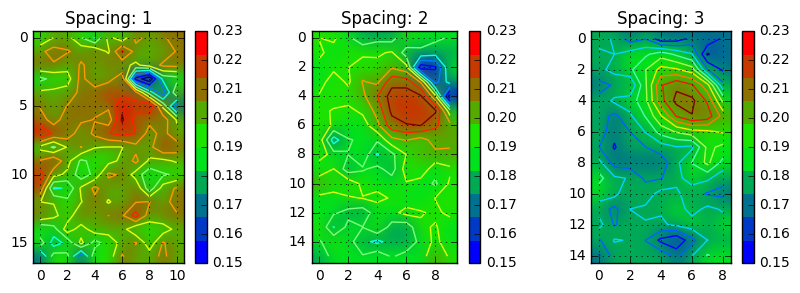

In [6]:
ShowPlots('vIndex', 10, 0.23, 0.15)

In [9]:
#baseSet = io.SetOfNodes(mNodes, size, size, row, col)
baseSet = [1,2,3,4, 14,15,16,17, 27,28,29,30, 40,41,42,43]
#baseSet = [1,2,3, 14,15,16, 27,28,29]
mDistance = io.mMinor(mData, baseSet)
pbData = ng.BaseSet(mDistance)

pbData.symIndex(), pbData.ro, np.sum(pbData.mG)/(pbData.size*pbData.size)

imD = la.inv(pbData.mG)

In [10]:
#baseSet = [1,2, 14,15]
baseSet = [1,2,3, 14,15,16, 27,28,29]
#baseSet = [1,2,3,4, 14,15,16,17, 27,28,29,30, 40,41,42,43]
mDistance = io.mMinor(mData, baseSet)
pbData = ng.BaseSet(mDistance)

vDistance = io.vDistance(mData, baseSet, 4)
db4 = ng.dbCoord(vDistance, pbData)
vDistance = io.vDistance(mData, baseSet, 40)
db40 = ng.dbCoord(vDistance, pbData)

#mData[4,40], db40.norma, db4.norma, db40.mutNorma(db4), db40.distance(db4), db40.pdistance(db4)
